In [1]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass['assorted'] = glass.glass_type.map({1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1})

In [2]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1,0


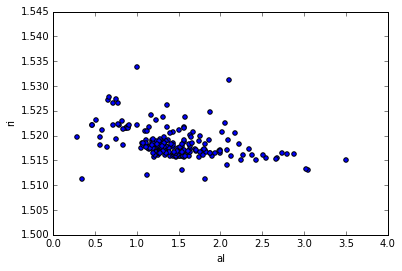

In [4]:
%matplotlib inline
glass.plot(kind='scatter', x='al', y='ri')

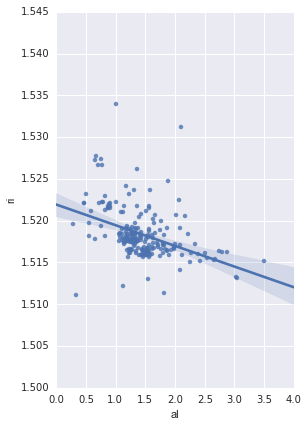

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
#for use later!
sns.pairplot(glass, x_vars=['al'], y_vars='ri', size=6, aspect=0.7, kind='reg')


In [12]:
type(glass['al'])
glass['al'].describe()
glass['ri'].describe()

count    214.000000
mean       1.518365
std        0.003037
min        1.511150
25%        1.516523
50%        1.517680
75%        1.519157
max        1.533930
Name: ri, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

feature_cols = ['al']
X = glass[feature_cols]
# X = glass['al']
y = glass['ri']

linreg = LinearRegression()
linreg.fit(X,y)

print linreg.intercept_
print linreg.coef_

intercept = linreg.intercept_
coef = linreg.coef_

1.52194533024
[-0.00247761]


In [68]:
glass.assorted.describe()

count    214.000000
mean       0.238318
std        0.427053
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: assorted, dtype: float64

In [19]:
ri_pred = linreg.predict(X)

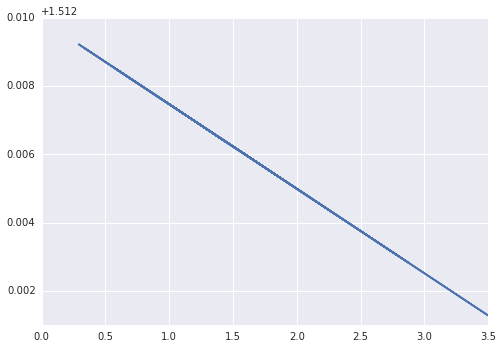

In [20]:
plt.plot(glass.al, ri_pred)

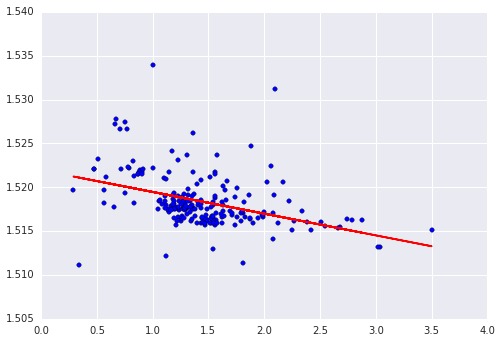

In [22]:
plt.plot(glass.al, ri_pred, color='red')
plt.scatter(glass.al, glass.ri)

In [23]:
linreg.intercept_ + 2 * linreg.coef_

array([ 1.51699012])

In [24]:
zip(feature_cols, linreg.coef_)

[('al', -0.0024776063874696256)]

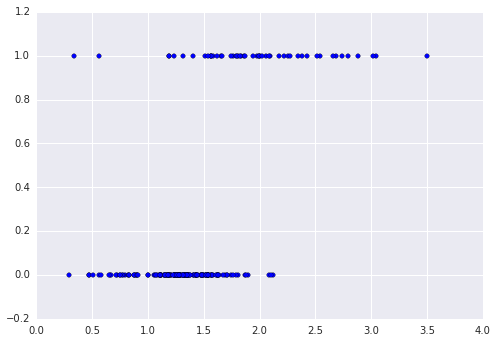

In [25]:
plt.scatter(glass.al, glass.assorted)

In [26]:
feature_cols = ['al']
X = glass[feature_cols]
# X = glass['al']
y = glass['assorted']

linreg = LinearRegression()
linreg.fit(X,y)

print linreg.intercept_
print linreg.coef_



-0.485836169197
[ 0.501177]


In [27]:
assorted_pred = linreg.predict(X)

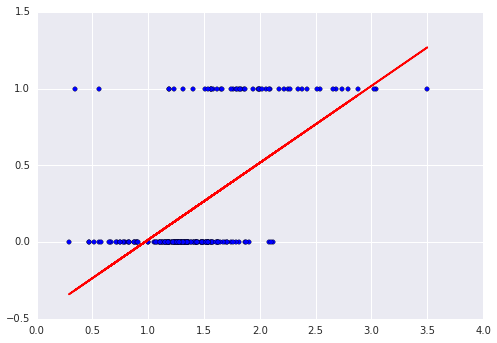

In [28]:
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred, color='red')

In [29]:
import numpy as np

In [30]:
nums = np.array([5,15,8])

In [31]:
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], 
      dtype='|S5')

In [47]:
assorted_pred_class = np.where(assorted_pred >= .5, 1,0)

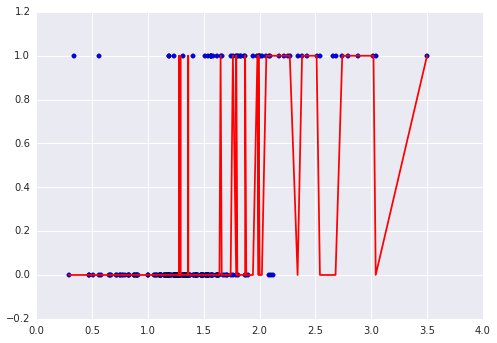

In [48]:
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_class, color='red')

In [49]:
glass['assorted_pred_class'] = assorted_pred_class

In [50]:
glass.sort('al', inplace=True)

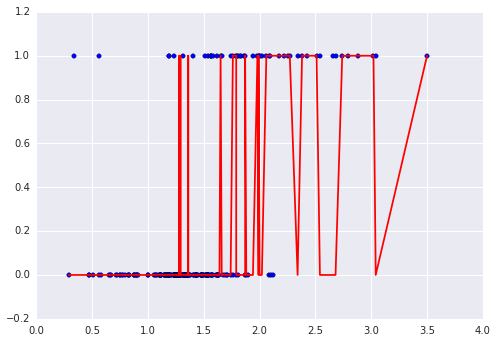

In [51]:
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, glass.assorted_pred_class, color='red')

In [56]:
glass.describe()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted,assorted_pred_class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374,0.238318,0.130841
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739,0.427053,0.338017
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000,0.000000,0.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000,1.000000,1.000000


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

feature_cols = ['al']
X = glass[feature_cols]
# X = glass['al']
y = glass['assorted']

logreg = LogisticRegression(C=1e9)
#reguralized parameter
logreg.fit(X,y)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001)

In [63]:
assorted_pred_class = logreg.predict(X)

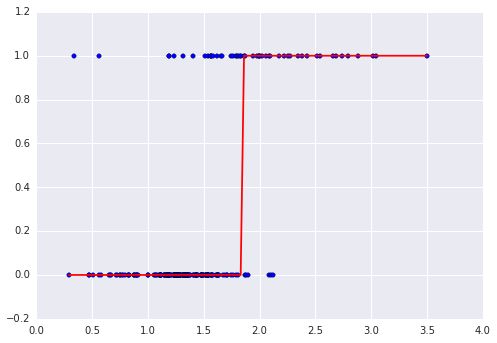

In [64]:
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_class, color='red')

In [65]:
assorted_pred_prob = logreg.predict_proba(X)[:,1]
# give me all rows, the 1th column
# predicted probability of assorted

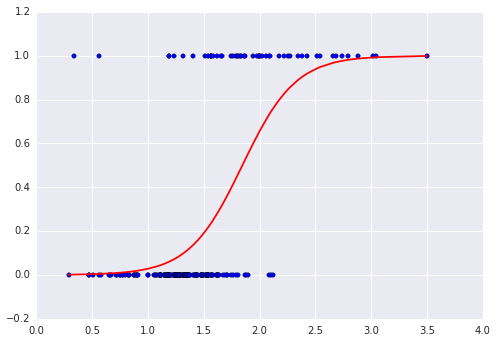

In [67]:
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_prob, color = 'red')
#plotted for each point, the predicted probablity that is is a 1
# could use either linear or logistic if the data is super separable

In [73]:
print logreg.predict_proba(1)
print logreg.predict_proba(2)
print logreg.predict_proba(3)

logreg.predict_proba(3).shape


[[ 0.97161726  0.02838274]]
[[ 0.34361555  0.65638445]]
[[ 0.00794192  0.99205808]]


(1, 2)

In [ ]:
assorted_pred_prob = logreg.predict_proba(X)[:,1]
# way of getting predict proba of class 1 not instead of class 1
# problem of logistic regression, it cant learn non-linear decision boundaries

In [74]:
# probability = outcome over universe
# odds = outcome over other outcomes 

# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [75]:
np.exp(1)
# e ^ 1 or just e

2.7182818284590451

In [76]:
np.log(2.718)
# time needed to reach that growtn is 1

0.99989631572895199

In [78]:
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225
